# EXAM WEEK 4. 
## GROUP 1: Andrea González, Marina Igual, CArolina Jiang

### Problem 1

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plotter
from sklearn.datasets import fetch_lfw_people #Data set of the faces
faces = fetch_lfw_people(min_faces_per_person=60) 
print(faces.target_names) #The names
print(faces.images.shape) 

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


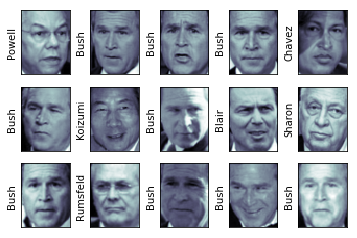

In [3]:
#Plot some of the images
fig, ax = plotter.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1], color = "black")

### Problem 2

In [4]:
#Rename the variables to have a easier code
names = ['Sharon','Powell','Rumsfeld','Bush','Schroeder','Chavez','Koizumi','Blair']
names = np.array(names)

targets = faces.target
print (targets)

[1 3 3 ... 7 3 5]


In [5]:
#Reduce the number of dimensions
#Choose the PCA components (from 50 to 150)
from sklearn.decomposition import RandomizedPCA

pca = RandomizedPCA(150)  #We choose 100 components to make the reduction.
faces_pca = pca.fit_transform(faces.data)

/home/osboxes/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
#Model for the compacted data
from sklearn.svm import SVC

clf = SVC(gamma='auto', kernel='rbf', C=8, degree=2, probability=True)
  
clf.fit(faces_pca[:],targets[:])

print(clf.classes_) #These numbers are the different classes to assign a name to each face. 

[0 1 2 3 4 5 6 7]


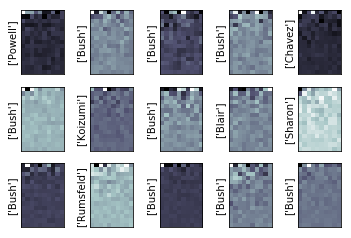

In [8]:
#Representing the model 
faces_pca_2 = faces_pca.reshape(1348,15,10) #Reshape the data to better representation

fig, ax = plotter.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces_pca_2[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    name_number = clf.predict(faces_pca[i:i+1])
    axi.set_ylabel(names[name_number], color = "black")

### Problem 3

In [10]:
#Split the data into a training and testing set

from sklearn.cross_validation import train_test_split

faces_fit, faces_train, targets_fit, targets_train = train_test_split(faces_pca, targets, test_size=0.2, random_state=1)

#The smaller array is formes with the 30% of the original data. 


### Problem 4

In [11]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = [1, 5, 10, 50] #Differents C values to test.
gamma_range = [0.0001, 0.0005, 0.001, 0.005] #DIfferent gamma values to test.
param_grid = dict(gamma=gamma_range, C=C_range)

cv = KFold(n_splits=5, shuffle=False, random_state=None)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(faces_train[:-1],targets_train[:-1]) #The model is adjust to a smaller array with part of the faces and their targets
grid.best_params_


print("The best parameters are %s with a score of %0.2f"
  % (grid.best_params_, grid.best_score_))


/home/osboxes/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


The best parameters are {'C': 1, 'gamma': 0.0001} with a score of 0.41


Answer: The best parameters are: C = 1 and gamma = 0.0001.


### Problem 5

In [12]:
#The optimal is inside the edges. 
#Expanding the grid to make sure what is the optimun. 

C_range = [0.5, 1, 5, 10, 50, 100] #Adding 3 numbers to C_range (0.5, 1, 100)
gamma_range = [0, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.05] #Adding 3 number to gamma_range (0, 0.00005 and 0.005)
param_grid = dict(gamma=gamma_range, C=C_range)

cv = KFold(n_splits=5, shuffle=False, random_state=None)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(faces_train[:-1],targets_train[:-1]) #The model is adjust to a smaller array with part of the faces and their targets
grid.best_params_


print("The best parameters are %s with a score of %0.2f"
  % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.5, 'gamma': 0} with a score of 0.41


Answer: Now the new best parameters are: C = 0.5 and gamma = 0. 
The meaning of this result: As well as lower value of C and gamma we have, the better model and prediction we are going to obtain. 

### Problem 6

In [13]:
#Use best estimator (best_estimator_ function) from grid search to predict labels for test sample generated in 3

SVC(C=1, gamma=0.0001, kernel='rbf', degree=2, probability=True)
  
clf.fit(faces_pca[:-1],targets[:-1])

SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

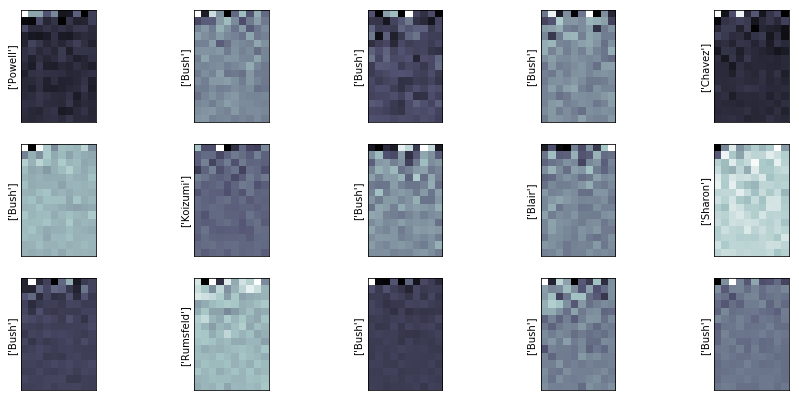

In [15]:
fig, ax = plotter.subplots(3, 5, figsize=(15, 7))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces_pca_2[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    name_number = clf.predict(faces_pca[i:i+1])
    axi.set_ylabel(names[name_number], color = "black")

### Problem 7

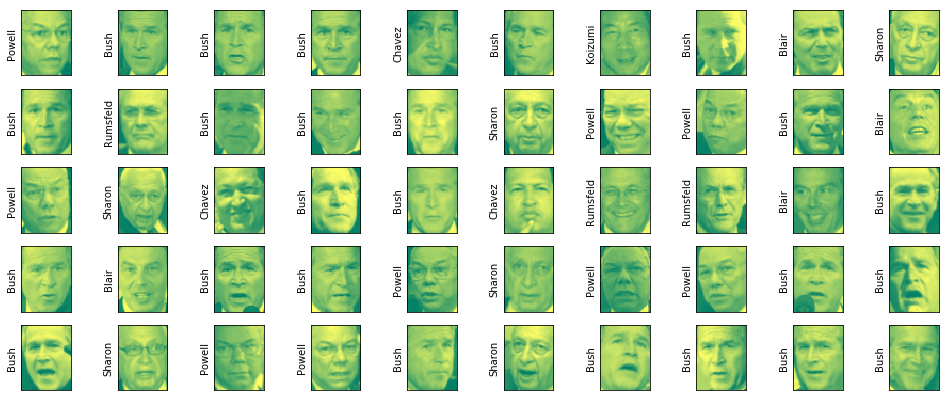

In [20]:
fig, ax = plotter.subplots(5, 10, figsize=(17, 7))
for i, axi in enumerate(ax.flat):
    name_number_1 = clf.predict(faces_pca[i:i+1])
    name_number_2 = faces.target[i]
    if name_number_1 == name_number_2:
        axi.set(xticks=[], yticks=[])
        axi.set_ylabel(names[name_number_2], color = "black")
        axi.imshow(faces.images[i], cmap='summer')
    
    else:
        axi.set(xticks=[], yticks=[])
        axi.set_ylabel(names[name_number_2], color = "black")
        axi.imshow(faces.images[i], cmap='hot')

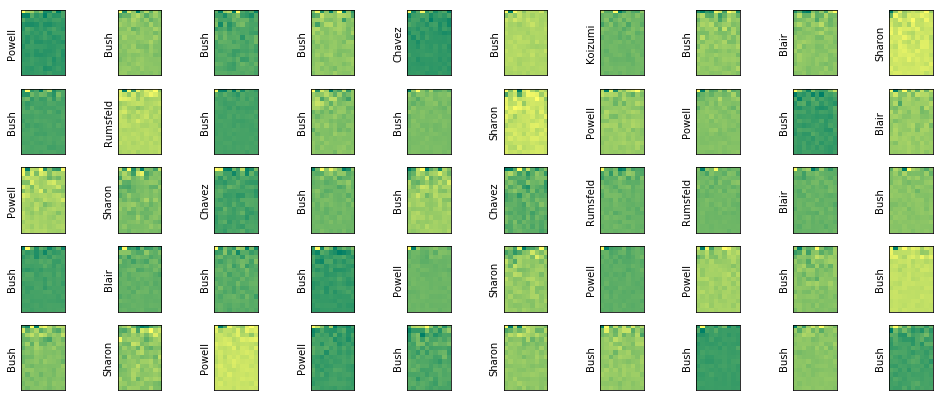

In [21]:
fig, ax = plotter.subplots(5, 10, figsize=(17, 7))
for i, axi in enumerate(ax.flat):
    name_number_1 = clf.predict(faces_pca[i:i+1])
    name_number_2 = faces.target[i]
    if name_number_1 == name_number_2:
        axi.set(xticks=[], yticks=[])
        axi.set_ylabel(names[name_number_2], color = "black")
        axi.imshow(faces_pca_2[i], cmap='summer')
    
    else:
        axi.set(xticks=[], yticks=[])
        axi.set_ylabel(names[name_number_2], color = "black")
        axi.imshow(faces_pca_2[i], cmap='hot')

All the images have a correct name